In [1]:
from IPython.display import HTML
from IPython.display import Image

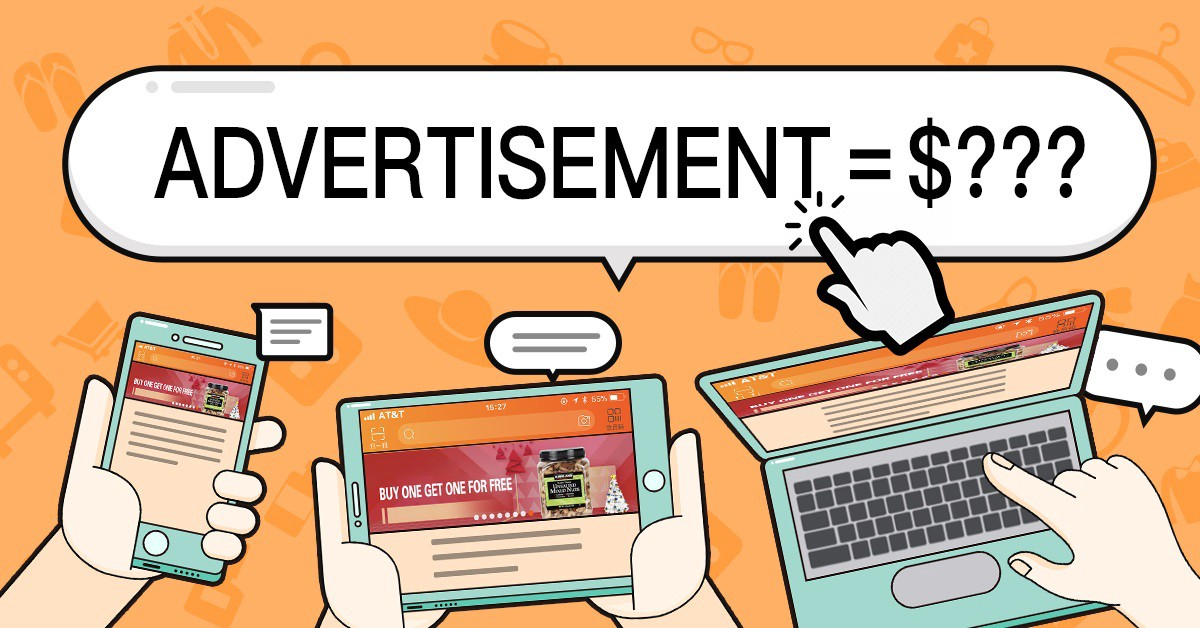

In [2]:
Image("banner.jpeg")

Project: Model Exploration for Click-Through Rate Prediction
======

**By: John Burt and Pieter Leffers**

*Start Date: 06/11/2018*

*Completion Date:*

Project Description
--------

For online advertising, click-through rate (CTR) is an important metric for identifying if an advertisement (*'Creative'*) is being viewed and providing an *'impression'* on the viewer of the advertisement. Presumably with the right kind / frequency of *'impressions'* on the viewer, the viewer will click on the advertisement; causing a *'conversion'*. A *'conversion'* is a moment when a viewer, whom may not otherwise, clicks on an advertisement on a provider's web page fulfilling the click objective of the creative. Click-through rate (CTR) is essential for online advertisement agencies and Ad Serving companies and is widely used as a metric for sponsored search options and real-time bidding.

For this project we aren't particularly interested in the Kaggle competition per-se since the competition has already ended. However, starting with a Kaggle dataset should help us get a better picture of the data format as well as the models we would want to implement on data of this kind. The next logical step upon completion of this project is searching for a *'real world'* data source of sufficient size and try to implement our final model in a meaningful way.

***Terms used***

**Conversion / Acquisition:** When a user signs up, makes a purchase, or performs some other desired action in response to an ad displayed on the Internet.

**Ad server:** Computer or group of computers responsible for actually serving creatives to websites or for making decisions about what ads will serve. An ad server may also track clicks on ads and other data. 

**Impression:** A creative served to a single user at a single point in time. 


Data Source(s)
-------

The data source we are using for this project is 10 days worth of Avazu data from a Kaggle competition between the dates (11/18/2014 6:04 PM UTC and 2/9/2015 11:59 PM UTC). We have chosen to use this data for exploring models and trying to define and tune parameters for our model building process. 


For more information about the Kaggle competition follow this link:  https://www.kaggle.com/c/avazu-ctr-prediction 


    Avazu: https://www.kaggle.com/c/avazu-ctr-prediction

    Criteo: https://www.kaggle.com/c/criteo-display-ad-challenge

    Outbrain: https://www.kaggle.com/c/outbrain-click-prediction

    RecSys 2015: http://dl.acm.org/citation.cfm?id=2813511&dl=ACM&coll=DL&CFID=941880276&CFTOKEN=60022934

    CriteoLabs 1T Click Data: http://labs.criteo.com/2013/12/download-terabyte-click-logs/

File descriptions

    train - Training set. 10 days of click-through data, ordered chronologically. Non-clicks and clicks are subsampled according to different strategies.
    test - Test set. 1 day of ads to for testing your model predictions. 
    sampleSubmission.csv - Sample submission file in the correct format, corresponds to the All-0.5 Benchmark.

Data fields

    id: ad identifier
    click: 0/1 for non-click/click
    hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
    C1 -- anonymized categorical variable
    banner_pos
    site_id
    site_domain
    site_category
    app_id
    app_domain
    app_category
    device_id
    device_ip
    device_model
    device_type
    device_conn_type
    C14-C21 -- anonymized categorical variables


In [97]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [2]:
import pandas as pd
import numpy as np
import random
#import xlearn as xl
#logistic regression l1 regularization
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model


In [ ]:
location='C://Users/pmlef/Documents/Python_work/Python_for_Data_Analysis/ClickData/'
data=pd.read_csv(location+'train.csv')
data.head()

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
id                  float64
click               int64
hour                int64
C1                  int64
banner_pos          int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
dtypes: float64(1), int64(14), object(9)
memory usage: 7.2+ GB


Random Sampling Method
-------

In [3]:
#This process will take a few minutes!

n = 40428967 #number of rows in the file
s = 500000 #desired sample size

convDict={'site_id':lambda x: int(x,16),
                     'site_domain':lambda x: int(x,16),
                     'site_category':lambda x: int(x,16),
                     'app_id':lambda x: int(x,16),
                     'app_domain':lambda x: int(x,16),
                     'app_category':lambda x: int(x,16),
                     'device_id':lambda x: int(x,16),
                     'device_ip':lambda x: int(x,16),
                     'device_model':lambda x: int(x,16),
                     'device_type':lambda x: int(x,16),
                     'device_conn_type':lambda x: int(x,16),
                    }
skip = sorted(random.sample(range(n),n-s))
#,converters=convDict
location='C://Users/pmlef/Documents/Python_work/Python_for_Data_Analysis/ClickData/'
data=pd.read_csv(location+'train.csv', skiprows=skip, header=None,converters=convDict) #Import only 10,000 randomized rows

DataHeader=pd.read_csv(location+'train.csv', nrows=0) #Grab the header from the Raw Dataset
data.columns=DataHeader.columns #Replace column names with those from the Raw Dataset

In [4]:
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10017756797097747189,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
1,10028586077501445095,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,100084,79
2,10039188268655357133,0,14102100,1005,0,f282ab5a,61eb5bc4,f028772b,ecad2386,7801e8d9,...,1,0,20596,320,50,2161,0,35,-1,157
3,10067309148384657022,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20352,320,50,2333,0,39,-1,157
4,10085825284640421991,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157


Convert Hex Column Values to Integers: 
    - site_id, site_domain, site_category, app_id, app_domain, app_category, device_id, device_ip, device_model

In [5]:
#Conversion list from Hex to numbers

convList=['site_id',
          'site_domain',
          'site_category',
          'app_id',
          'app_domain',
          'app_category',
          'device_id',
          'device_ip',
          'device_model',
         ]

for i in convList:
    data[i]=data[i].apply(lambda x: int(x,16))
    
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10017756797097747189,0,14102100,1005,0,1413108638,3351916808,1048658224,3970769798,2013391065,...,1,0,20366,320,50,2333,0,39,-1,157
1,10028586077501445095,0,14102100,1005,0,532546046,4085536615,680550077,3970769798,2013391065,...,1,0,15705,320,50,1722,0,35,100084,79
2,10039188268655357133,0,14102100,1005,0,4068649818,1642814404,4029183787,3970769798,2013391065,...,1,0,20596,320,50,2161,0,35,-1,157
3,10067309148384657022,0,14102100,1005,0,1413108638,3351916808,1048658224,3970769798,2013391065,...,1,0,20352,320,50,2333,0,39,-1,157
4,10085825284640421991,0,14102100,1005,0,1413108638,3351916808,1048658224,3970769798,2013391065,...,1,0,20362,320,50,2333,0,39,-1,157


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500001 entries, 0 to 500000
Data columns (total 24 columns):
id                  500001 non-null uint64
click               500001 non-null int64
hour                500001 non-null int64
C1                  500001 non-null int64
banner_pos          500001 non-null int64
site_id             500001 non-null int64
site_domain         500001 non-null int64
site_category       500001 non-null int64
app_id              500001 non-null int64
app_domain          500001 non-null int64
app_category        500001 non-null int64
device_id           500001 non-null int64
device_ip           500001 non-null int64
device_model        500001 non-null int64
device_type         500001 non-null int64
device_conn_type    500001 non-null int64
C14                 500001 non-null int64
C15                 500001 non-null int64
C16                 500001 non-null int64
C17                 500001 non-null int64
C18                 500001 non-null int64
C19   

Counts of unique values in each column:

In [7]:
Counts=pd.DataFrame(index=['Counts'])
for i in data.columns:
    Counts[i]=data[i].unique().shape
Counts.T 

,Counts
id,500001
click,2
hour,240
C1,7
banner_pos,7
site_id,2302
site_domain,2335
site_category,20
app_id,2462
app_domain,154


Regularized Logistic Regression (Gradient Descent)
-------------------

In [8]:
y=pd.DataFrame(data['click']).copy()

**Outcome**

In [9]:
y.head()

,click
0,0
1,0
2,0
3,0
4,0


**Features**

In [10]:
X=data.iloc[:,1:].copy()
#X=data.iloc[:,1:].copy()
X['click']=1
X.rename(index=str, columns={'click': 'intercept'},inplace=True)

In [11]:
X.head()

,intercept,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1,14102100,1005,0,1413108638,3351916808,1048658224,3970769798,2013391065,131587874,...,1,0,20366,320,50,2333,0,39,-1,157
1,1,14102100,1005,0,532546046,4085536615,680550077,3970769798,2013391065,131587874,...,1,0,15705,320,50,1722,0,35,100084,79
2,1,14102100,1005,0,4068649818,1642814404,4029183787,3970769798,2013391065,131587874,...,1,0,20596,320,50,2161,0,35,-1,157
3,1,14102100,1005,0,1413108638,3351916808,1048658224,3970769798,2013391065,131587874,...,1,0,20352,320,50,2333,0,39,-1,157
4,1,14102100,1005,0,1413108638,3351916808,1048658224,3970769798,2013391065,131587874,...,1,0,20362,320,50,2333,0,39,-1,157


In [12]:
colNames=list(X.columns)
m,n = X.shape
y = np.array(y)
theta = np.array(np.zeros(n).reshape(n,1))

Using L2 Regularization

In [13]:
from sklearn import linear_model

def regLogitRegress(X,y):
    model = linear_model.LogisticRegression(penalty='l2', C=1)# Setting Regularization Parameter
    model.fit(X, y.ravel())
    Accuracy=model.score(X, y)
    print('The accuracy of the model (R-Square):',Accuracy)
    coeff_df = pd.DataFrame(data=list(zip(X.columns, model.coef_[0].T)),columns=['Coefficient','Estimate'])
    #coeff_df['OddsRatio']=np.exp(coeff_df['Estimate'])
    Y_mean=y.mean()
    print('Target average:',Y_mean)
    return coeff_df

In [14]:
%%time
Output=regLogitRegress(X,y)

The accuracy of the model (R-Square): 0.830418339163
Target average: 0.169581660837
Wall time: 14.8 s


**Estimates**

In [15]:
Output

,Coefficient,Estimate
0,intercept,-3.608902e-15
1,hour,-5.089598e-08
2,C1,-3.632227e-12
3,banner_pos,5.261601e-15
4,site_id,-1.498856e-11
5,site_domain,-1.969725e-10
6,site_category,-1.216395e-10
7,app_id,1.459533e-10
8,app_domain,-1.311866e-10
9,app_category,-4.785865e-11


Regularized Logistic Regression (Stochastic Gradient Descent)
---------------------------

In [25]:
y=pd.DataFrame(data['click']).copy()

**Outcome**

In [26]:
y.head()

,click
0,0
1,0
2,0
3,0
4,0


In [27]:
X=data.iloc[:,1:].copy()
#X=data.iloc[:,1:].copy()
X['click']=1
X.rename(index=str, columns={'click': 'intercept'},inplace=True)

**Features**

In [28]:
X.head()

,intercept,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1,14102100,1005,0,1413108638,3351916808,1048658224,3970769798,2013391065,131587874,...,1,0,20366,320,50,2333,0,39,-1,157
1,1,14102100,1005,0,532546046,4085536615,680550077,3970769798,2013391065,131587874,...,1,0,15705,320,50,1722,0,35,100084,79
2,1,14102100,1005,0,4068649818,1642814404,4029183787,3970769798,2013391065,131587874,...,1,0,20596,320,50,2161,0,35,-1,157
3,1,14102100,1005,0,1413108638,3351916808,1048658224,3970769798,2013391065,131587874,...,1,0,20352,320,50,2333,0,39,-1,157
4,1,14102100,1005,0,1413108638,3351916808,1048658224,3970769798,2013391065,131587874,...,1,0,20362,320,50,2333,0,39,-1,157


In [29]:
colNames=list(X.columns)
m,n = X.shape
y = np.array(y)
theta = np.array(np.zeros(n).reshape(n,1))

In [56]:
from sklearn import linear_model

def sgdLogitRegress(X,y):
    # model = linear_model.LogisticRegression(penalty='l1', C=1.0, verbose=True)
    model = linear_model.SGDClassifier(loss='log',penalty='l2',max_iter=25, tol=None, verbose=False,alpha=.01)
    model.fit(X, y.ravel())
    Accuracy=model.score(X, y)
    print('The accuracy of the model (R-Square):',Accuracy)
    coeff_df = pd.DataFrame(data=list(zip(X.columns, model.coef_[0].T)),columns=['Coefficient','Estimate'])
    Y_mean=y.mean()
    print('Target average:',Y_mean)
    return coeff_df

In [57]:
%%time
Output=sgdLogitRegress(X,y)

The accuracy of the model (R-Square): 0.830418339163
Target average: 0.169581660837
Wall time: 6.67 s


In [58]:
Output

,Coefficient,Estimate
0,intercept,-0.068844
1,hour,-970948.379644
2,C1,-69.615934
3,banner_pos,0.373638
4,site_id,-84219.501178
5,site_domain,19379.996202
6,site_category,-61600.637840
7,app_id,-22689.004746
8,app_domain,20231.963523
9,app_category,-39984.658971


Regression Trees 
-----------------

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

**Outcome**

In [60]:
y=pd.DataFrame(data['click']).copy()
y_colNames=y.columns
y.head()

,click
0,0
1,0
2,0
3,0
4,0


**Features**

In [61]:
X=data.iloc[:,1:].copy()
X['click']=1
X.rename(index=str, columns={'click': 'intercept'},inplace=True)
X_colNames=X.columns

In [62]:
colNames=list(X.columns)
m,n = X.shape
y = np.array(y)
theta = np.array(np.zeros(n).reshape(n,1))

In [63]:
X.head()

,intercept,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1,14102100,1005,0,1413108638,3351916808,1048658224,3970769798,2013391065,131587874,...,1,0,20366,320,50,2333,0,39,-1,157
1,1,14102100,1005,0,532546046,4085536615,680550077,3970769798,2013391065,131587874,...,1,0,15705,320,50,1722,0,35,100084,79
2,1,14102100,1005,0,4068649818,1642814404,4029183787,3970769798,2013391065,131587874,...,1,0,20596,320,50,2161,0,35,-1,157
3,1,14102100,1005,0,1413108638,3351916808,1048658224,3970769798,2013391065,131587874,...,1,0,20352,320,50,2333,0,39,-1,157
4,1,14102100,1005,0,1413108638,3351916808,1048658224,3970769798,2013391065,131587874,...,1,0,20362,320,50,2333,0,39,-1,157


In [64]:
model = RandomForestClassifier(n_estimators=2,random_state=0,max_features="auto") #(sqrt n features)="auto"
model.fit(X, y.ravel())
Accuracy=model.score(X, y)
print(Accuracy)

0.916496167008


In [65]:
importFeature=model.feature_importances_ 
output=pd.DataFrame(importFeature,columns=['Feature Importance'])
output['Features']=colNames
output

,Feature Importance,Features
0,0.000000,intercept
1,0.218631,hour
2,0.001560,C1
3,0.003695,banner_pos
4,0.029387,site_id
5,0.025210,site_domain
6,0.007375,site_category
7,0.014329,app_id
8,0.006761,app_domain
9,0.011074,app_category


50/50 Split of Clicks and Non-Clicks
--------------

In [68]:
# extract our X and y variables for training
y = data['click'].copy()
X = data[data.columns.values[2:]].copy()

# from the larger dataset, subsample nsamps click and no-click records
y0 = y[y==0]
X0 = X[y==0]
y1 = y[y==1]
X1 = X[y==1]

nsamps = y1.shape[0]

print("original data = %d rows: %d clicks, %d nonclicks %1.1f%% clicks"%(
    y.shape[0], y1.shape[0], y0.shape[0], 100*y1.shape[0]/y.shape[0]))

y_eq = y1[:nsamps].append(y0[:nsamps], ignore_index=True)
X_eq = X1[:nsamps].append(X0[:nsamps], ignore_index=True)

print("training data = %d rows, equal# clicks/nonclicks "%(y_eq.shape[0]))

original data = 500001 rows: 84791 clicks, 415210 nonclicks 17.0% clicks
training data = 169582 rows, equal# clicks/nonclicks 


In [69]:
from sklearn import linear_model

# model = linear_model.LogisticRegression(penalty='l1', C=1.0, verbose=True)
model = linear_model.SGDClassifier(loss='log', max_iter=10, tol=None, verbose=False)
model.fit(X, y)
Accuracy=model.score(X, y)
print('model accuracy:',Accuracy)
coeff_df = pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))
Y_mean=y.mean()
print('Target average:',Y_mean)



model accuracy: 0.830418339163
Target average: 0.16958166083667833


Hyperperameter Tuning
-----------------------

In [70]:
from time import time
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define SGDClassifier defaults: 
# define defaults: doing it this way allows us to define our own default params
clf_defaults = {
    'loss' : 'log',
    'alpha' : 1e-03, 
    'penalty' : 'l2',
    'max_iter' : 10,
    'tol' : None
    }

# Create a pipeline, allowing to tune a transformer and the SGDClassifier classifier.
# (transformer not implemented yet)
pipeline = Pipeline([    
    ('clf', SGDClassifier(**clf_defaults)),
])

# Define the parameters and values we want to test.
# Uncommenting more parameters will give better exploring power but will
#   increase processing time in a combinatorial way. I suggest tuning <= 3
#   parameters at a time.
# Note the naming format: pipelineobjectname__paramname
parameters = {
    'clf__alpha': (1e-01, 1e-02, 1e-03, 1e-04),
#     'clf__penalty': ( 'none', 'l2', 'l1', 'elasticnet'),
    'clf__penalty': ( 'l2', 'l1'),
    'clf__max_iter': (50, 100, 200, 500),
}

# Create the grid search object.
# Note that "n_jobs=-1" means that the search will use all of the 
#  computer's available processing cores to speed things up.
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
# print("parameters:")
# print(parameters)
t0 = time()

# Run the grid search to find the best parameters for the classifier.
grid_search.fit(X_eq, y_eq)

print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  8.8min finished


done in 542.313s

Best score: 0.529
Best parameters set:
	clf__alpha: 0.0001
	clf__max_iter: 100
	clf__penalty: 'l1'
